# Fraud Detection Analysis for Banking
This notebook walks through the end-to-end process of identifying fraudulent transactions using simulated banking data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data
df = pd.read_csv("Fraud_Transactions_Simulated.csv")
df.head()

,Transaction_ID,User_ID,Amount,Transaction_Type,Location,Time_of_Day,Is_Fraud
0,1,4174,199.27,transfer,Sydney,afternoon,0
1,2,4507,121.63,in-person,New York,morning,0
2,3,1860,131.56,transfer,Singapore,morning,0
3,4,2294,283.58,online,Mumbai,afternoon,0
4,5,2130,66.23,in-person,Mumbai,night,0


## Step 1: Understand the Dataset

Dataset Shape: (10000, 7)

Summary Statistics:
       Transaction_ID       User_ID        Amount      Is_Fraud
count     10000.00000  10000.000000  10000.000000  10000.000000
mean       5000.50000   3010.561100    197.616955      0.024800
std        2886.89568   1152.371939    197.850126      0.155523
min           1.00000   1000.000000      0.010000      0.000000
25%        2500.75000   2001.750000     56.582500      0.000000
50%        5000.50000   3004.000000    134.885000      0.000000
75%        7500.25000   4010.000000    275.965000      0.000000
max       10000.00000   4999.000000   1708.650000      1.000000

Fraud Distribution:
0    97.52
1     2.48
Name: Is_Fraud, dtype: float64


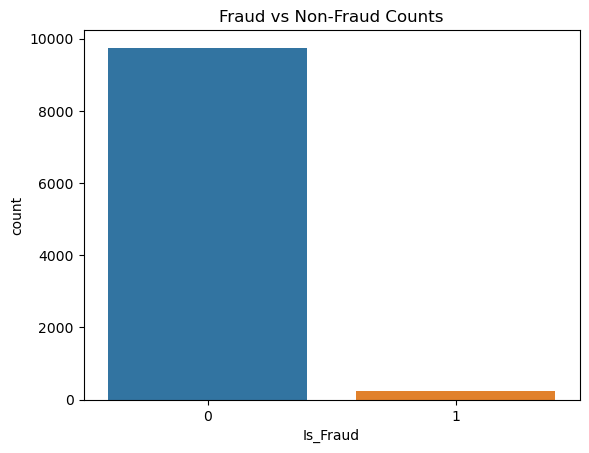

In [2]:
print("Dataset Shape:", df.shape)
print("\nSummary Statistics:")
print(df.describe())

print("\nFraud Distribution:")
print(df['Is_Fraud'].value_counts(normalize=True) * 100)

sns.countplot(data=df, x='Is_Fraud')
plt.title("Fraud vs Non-Fraud Counts")
plt.show()

## Step 2: Visual Patterns

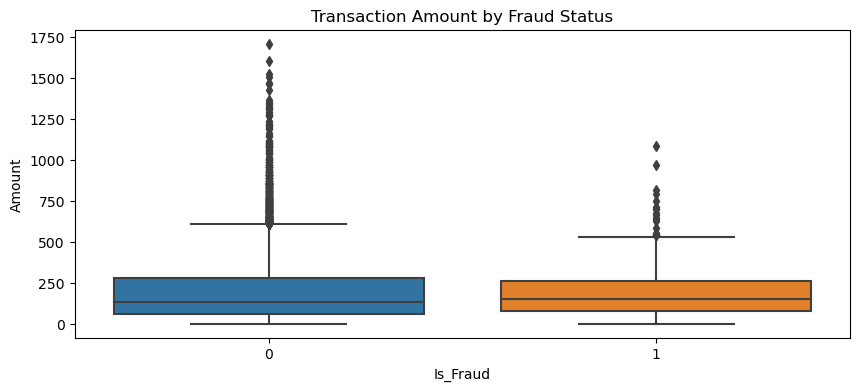

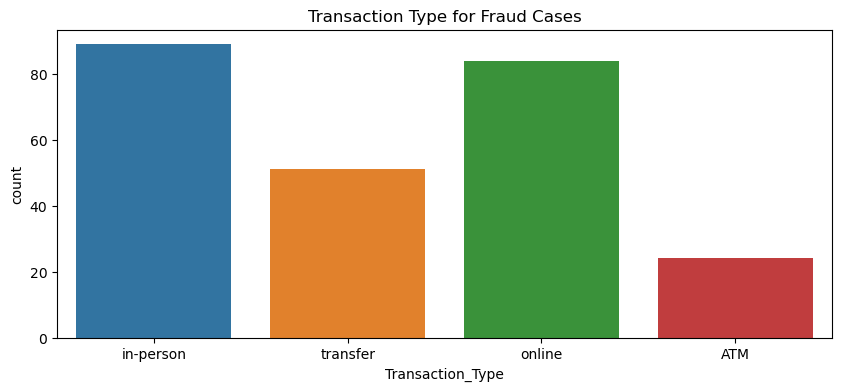

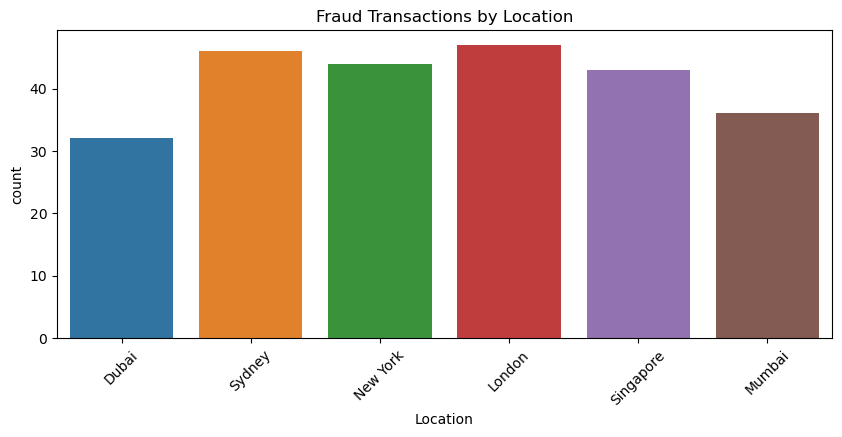

In [3]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Is_Fraud', y='Amount')
plt.title("Transaction Amount by Fraud Status")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(data=df[df['Is_Fraud']==1], x='Transaction_Type')
plt.title("Transaction Type for Fraud Cases")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(data=df[df['Is_Fraud']==1], x='Location')
plt.title("Fraud Transactions by Location")
plt.xticks(rotation=45)
plt.show()

## Step 3: Data Preparation for Modeling

In [4]:
df_encoded = pd.get_dummies(df, columns=['Transaction_Type', 'Location', 'Time_of_Day'], drop_first=True)
X = df_encoded.drop(['Transaction_ID', 'User_ID', 'Is_Fraud'], axis=1)
y = df_encoded['Is_Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (8000, 11)
Testing set size: (2000, 11)


## Step 4: Train a Fraud Detection Model

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9605

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1950
           1       0.03      0.02      0.02        50

    accuracy                           0.96      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.95      0.96      0.96      2000


Confusion Matrix:
 [[1920   30]
 [  49    1]]


## Step 5: Feature Importance

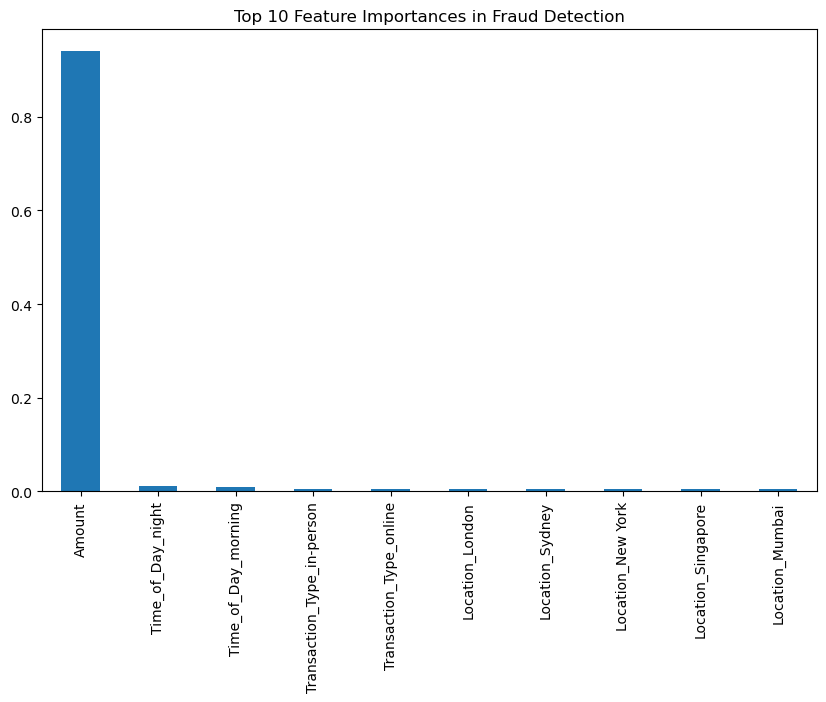

In [6]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances in Fraud Detection")
plt.show()